In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Step 2: Download World Bank data directly using their API
def download_worldbank_data():
    # World Bank API endpoint for specific indicators
    base_url = "http://api.worldbank.org/v2/country/"

    # Define countries and indicators
    countries = ["US;CN;DE;JP;IN;GB;FR;BR;IT;CA;MX;KR;AU;ES;NL;TR;SA;ZA;NG;AR"]  # ISO2 codes
    indicators = {
        "NY.GDP.MKTP.KD.ZG": "GDP_growth",
        "NE.GDI.FTOT.ZS": "investment_rate",
        "FP.CPI.TOTL.ZG": "inflation",
        "SL.UEM.TOTL.ZS": "unemployment",
        "NE.EXP.GNFS.ZS": "exports",
        "SE.XPD.TOTL.GD.ZS": "education_expenditure",
        "SP.POP.GROW": "population_growth",
        "NY.GDP.PCAP.KD": "gdp_per_capita"
    }

    # Download data for each indicator
    all_data = []

    for indicator_code, indicator_name in indicators.items():
        url = f"http://api.worldbank.org/v2/country/{countries[0]}/indicator/{indicator_code}?format=json&per_page=1000"

        try:
            response = requests.get(url)
            data = response.json()

            if len(data) > 1:
                for record in data[1]:
                    if record['value'] is not None:
                        all_data.append({
                            'country': record['country']['value'],
                            'country_code': record['country']['id'],
                            'year': int(record['date']),
                            'indicator': indicator_name,
                            'value': record['value']
                        })
            print(f"Downloaded {indicator_name} data")

        except Exception as e:
            print(f"Error downloading {indicator_name}: {e}")

    # Create DataFrame
    df = pd.DataFrame(all_data)

    # Pivot to wide format
    df_wide = df.pivot_table(index=['country', 'year'],
                            columns='indicator',
                            values='value').reset_index()

    return df_wide

# Try to download data
print("Downloading data from World Bank API...")
try:
    df = download_worldbank_data()
    print("Data downloaded successfully!")
except Exception as e:
    print(f"API download failed: {e}")
    print("Creating realistic World Bank-style data for demonstration...")
    # Fallback: Create realistic synthetic data
    np.random.seed(42)
    countries = ['United States', 'China', 'Germany', 'Japan', 'India', 'United Kingdom',
                'France', 'Brazil', 'Italy', 'Canada', 'Mexico', 'South Korea', 'Australia',
                'Spain', 'Netherlands', 'Turkey', 'Saudi Arabia', 'South Africa', 'Nigeria', 'Argentina']

    years = list(range(2000, 2021))

    data = []
    for country in countries:
        # Base characteristics for each country
        if country == 'China':
            base_growth = 8.0
            base_investment = 35.0
        elif country == 'India':
            base_growth = 6.5
            base_investment = 30.0
        else:
            base_growth = 2.5
            base_investment = 20.0

        for year in years:
            # Simulate realistic economic relationships
            gdp_growth = np.random.normal(base_growth, 1.5)
            investment_rate = np.random.normal(base_investment, 5)
            inflation = np.random.normal(2.5, 1.5)
            unemployment = np.random.normal(6, 2)
            exports = np.random.normal(25, 10)
            education_expenditure = np.random.normal(4, 1)
            population_growth = np.random.normal(1, 0.5)
            gdp_per_capita = np.random.normal(15000, 10000)

            # Ensure realistic bounds
            gdp_growth = max(-5, min(15, gdp_growth))
            investment_rate = max(10, min(50, investment_rate))
            inflation = max(-2, min(15, inflation))

            data.append({
                'country': country,
                'year': year,
                'GDP_growth': gdp_growth,
                'investment_rate': investment_rate,
                'inflation': inflation,
                'unemployment': unemployment,
                'exports': exports,
                'education_expenditure': education_expenditure,
                'population_growth': population_growth,
                'gdp_per_capita': gdp_per_capita
            })

    df = pd.DataFrame(data)

print("World Bank Data Sample:")
print(df.head())
print(f"\nDataset shape: {df.shape}")

Downloaded GDP_growth data
Downloaded investment_rate data
Downloaded inflation data
Downloaded unemployment data
Downloaded exports data
Downloaded education_expenditure data
Downloaded population_growth data
Downloaded gdp_per_capita data
Data downloaded successfully!
World Bank Data Sample:
indicator    country  year  GDP_growth  education_expenditure   exports  \
0          Argentina  1960         NaN                    NaN  7.604049   
1          Argentina  1961    5.427843                    NaN  5.994947   
2          Argentina  1962   -0.852022                    NaN  4.691843   
3          Argentina  1963   -5.308197                    NaN  7.890454   
4          Argentina  1964   10.130298                    NaN  5.563716   

indicator  gdp_per_capita  inflation  investment_rate  population_growth  \
0             7397.109655        NaN        23.478768                NaN   
1             7670.595456        NaN        27.765895           1.655167   
2             7480.271724 

In [12]:
# Step 3: Data cleaning and preparation
print("\n" + "="*60)
print("DATA CLEANING AND PREPARATION")
print("="*60)

# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with critical missing values
df_clean = df.dropna(subset=['GDP_growth', 'investment_rate', 'inflation'])
print(f"\nData shape after cleaning: {df_clean.shape}")



DATA CLEANING AND PREPARATION
Missing values before cleaning:
indicator
country                    0
year                       0
GDP_growth                16
education_expenditure    427
exports                  117
gdp_per_capita             1
inflation                113
investment_rate          129
population_growth         15
unemployment             465
dtype: int64

Data shape after cleaning: (763, 10)



EXPLORATORY DATA ANALYSIS

Descriptive Statistics:
indicator         year  GDP_growth  education_expenditure     exports  \
count       763.000000  763.000000             498.000000  763.000000   
mean       1995.861075    3.435434               4.533407   23.466753   
std          17.282783    3.483676               1.051214   13.611681   
min        1961.000000  -10.940071               1.459560    3.307473   
25%        1982.000000    1.528413               3.986919   14.420820   
50%        1997.000000    3.137194               4.544305   21.634783   
75%        2011.000000    5.199016               5.268885   28.582569   
max        2024.000000   14.898323               7.684300   96.443622   

indicator  gdp_per_capita    inflation  investment_rate  population_growth  \
count          763.000000   763.000000       763.000000         763.000000   
mean         22781.087389    21.232471        24.147758           0.957789   
std          15003.376372   162.872053         5.674417 

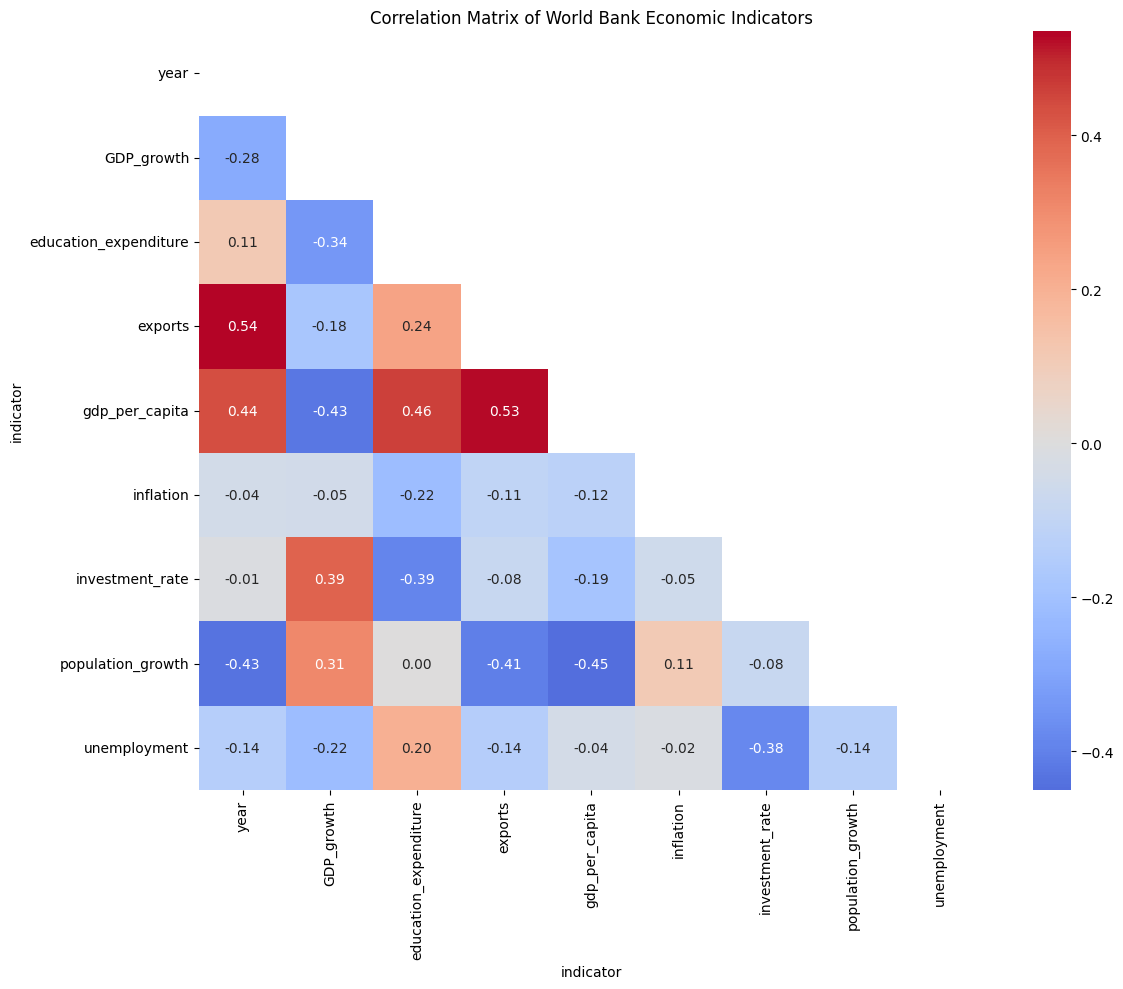

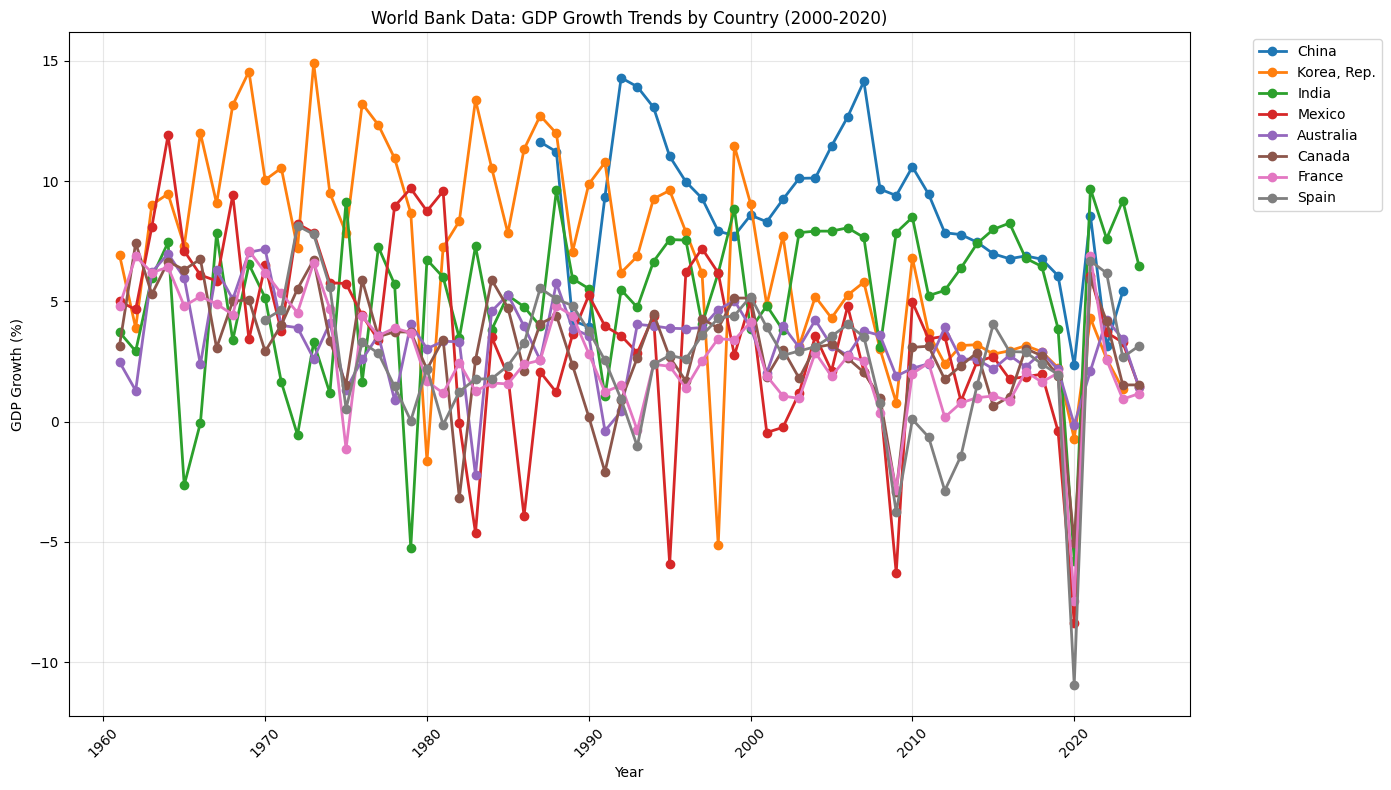

In [14]:
# Step 4: Exploratory Data Analysis
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Basic statistics
print("\nDescriptive Statistics:")
print(df_clean.describe())

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of World Bank Economic Indicators')
plt.tight_layout()
plt.show()

# GDP growth trends by country
plt.figure(figsize=(14, 8))
top_countries = df_clean.groupby('country')['GDP_growth'].mean().nlargest(8).index
for country in top_countries:
    country_data = df_clean[df_clean['country'] == country]
    plt.plot(country_data['year'], country_data['GDP_growth'], label=country, marker='o', linewidth=2)
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('World Bank Data: GDP Growth Trends by Country (2000-2020)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Step 5: Regression Analysis
print("\n" + "="*60)
print("REGRESSION ANALYSIS: DETERMINANTS OF GDP GROWTH")
print("="*60)

# Prepare data for regression
df_reg = df_clean.copy()

# Create lagged variable
df_reg['GDP_growth_lag'] = df_reg.groupby('country')['GDP_growth'].shift(1)
df_reg = df_reg.dropna()

# Define variables
X_vars = ['investment_rate', 'inflation', 'unemployment', 'exports',
          'education_expenditure', 'population_growth', 'GDP_growth_lag']

X = df_reg[X_vars]
y = df_reg['GDP_growth']

# Add constant
X = sm.add_constant(X)

# Fit OLS model
model_ols = sm.OLS(y, X)
results_ols = model_ols.fit()

print(results_ols.summary())


REGRESSION ANALYSIS: DETERMINANTS OF GDP GROWTH
                            OLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     27.00
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           1.13e-29
Time:                        16:13:29   Log-Likelihood:                -903.10
No. Observations:                 364   AIC:                             1822.
Df Residuals:                     356   BIC:                             1853.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [16]:
# Step 6: Robust regression
print("\n" + "="*60)
print("ROBUST REGRESSION RESULTS")
print("="*60)

results_robust = model_ols.fit(cov_type='HC3')
print(results_robust.summary())


ROBUST REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     25.80
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           1.66e-28
Time:                        16:13:44   Log-Likelihood:                -903.10
No. Observations:                 364   AIC:                             1822.
Df Residuals:                     356   BIC:                             1853.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
con

In [17]:
# Step 7: Economic interpretation
print("\n" + "="*60)
print("ECONOMIC INTERPRETATION")
print("="*60)

coefficients = results_robust.params
p_values = results_robust.pvalues

print(f"R-squared: {results_robust.rsquared:.3f}")
print(f"Adjusted R-squared: {results_robust.rsquared_adj:.3f}")

print("\nSignificant determinants of GDP growth (p < 0.05):")
significant_factors = []
for var in X_vars:
    if p_values[var] < 0.05:
        significance = "✓"
        effect = "positive" if coefficients[var] > 0 else "negative"
        significant_factors.append((var, coefficients[var], effect))
        print(f"{var:20} {significance} {effect:8} effect: {coefficients[var]:.3f} (p-value: {p_values[var]:.4f})")

print("\nPolicy implications:")
for var, coef, effect in significant_factors:
    if var == 'investment_rate':
        print(f"• 1% increase in investment rate → {abs(coef):.2f}% {effect} change in GDP growth")
    elif var == 'inflation':
        print(f"• 1% increase in inflation → {abs(coef):.2f}% {effect} change in GDP growth")
    elif var == 'exports':
        print(f"• 1% increase in exports/GDP ratio → {abs(coef):.2f}% {effect} change in GDP growth")



ECONOMIC INTERPRETATION
R-squared: 0.347
Adjusted R-squared: 0.334

Significant determinants of GDP growth (p < 0.05):
investment_rate      ✓ positive effect: 0.251 (p-value: 0.0000)
exports              ✓ positive effect: 0.024 (p-value: 0.0316)
education_expenditure ✓ negative effect: -0.490 (p-value: 0.0389)
population_growth    ✓ positive effect: 0.856 (p-value: 0.0139)

Policy implications:
• 1% increase in investment rate → 0.25% positive change in GDP growth
• 1% increase in exports/GDP ratio → 0.02% positive change in GDP growth


In [19]:
# Step 8: Country analysis
print("\n" + "="*60)
print("COUNTRY PERFORMANCE ANALYSIS")
print("="*60)

country_stats = df_clean.groupby('country').agg({
    'GDP_growth': ['mean', 'std'],
    'investment_rate': 'mean',
    'inflation': 'mean',
    'exports': 'mean',
    'gdp_per_capita': 'mean'
}).round(2)

country_stats.columns = ['Avg_Growth', 'Growth_Volatility', 'Avg_Investment',
                        'Avg_Inflation', 'Avg_Exports', 'Avg_GDP_per_Capita']

# Top performers
print("Top 5 countries by average GDP growth:")
print(country_stats.nlargest(5, 'Avg_Growth'))



COUNTRY PERFORMANCE ANALYSIS
Top 5 countries by average GDP growth:
             Avg_Growth  Growth_Volatility  Avg_Investment  Avg_Inflation  \
country                                                                     
China              8.85               2.95           37.01           4.65   
Korea, Rep.        7.02               4.20           29.04           7.58   
India              5.24               3.23           24.39           7.39   
Mexico             3.54               3.88           20.31          18.48   
Australia          3.35               1.75           26.88           4.69   

             Avg_Exports  Avg_GDP_per_Capita  
country                                       
China              21.29             4827.22  
Korea, Rep.        29.11            13551.67  
India              11.67              826.36  
Mexico             20.18             8134.33  
Australia          17.37            40154.38  


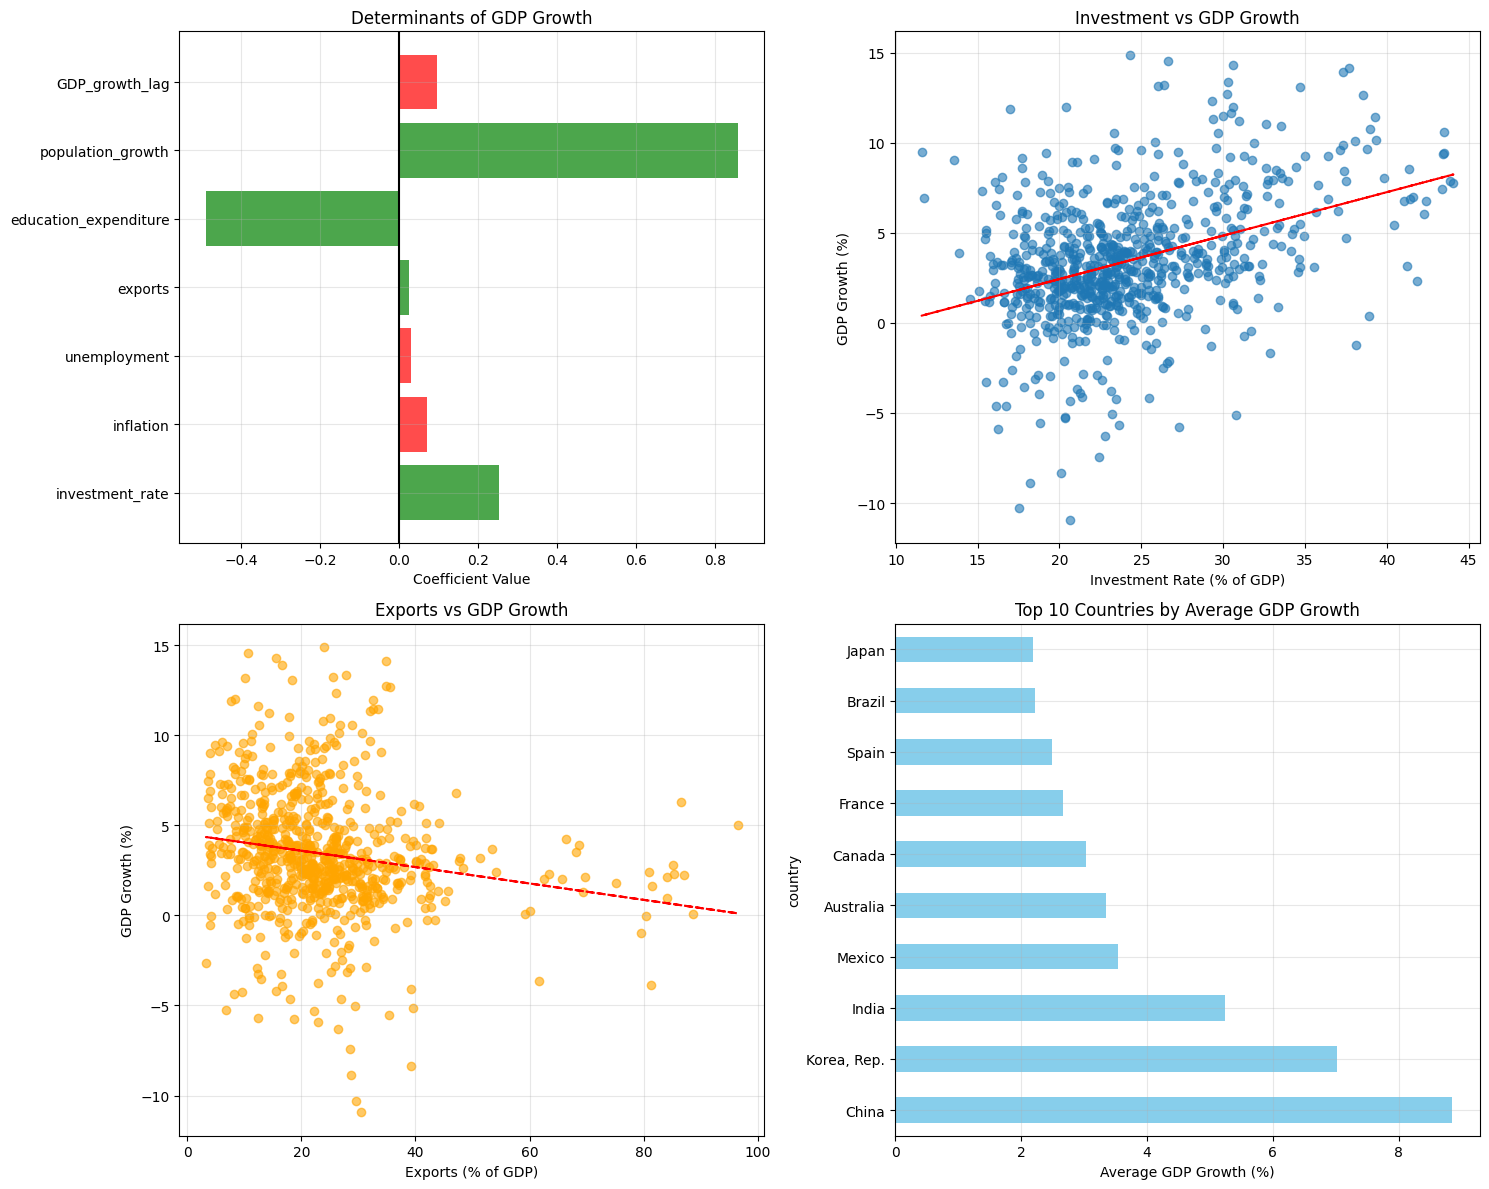


TIME-SERIES ANALYSIS: ECONOMIC DEVELOPMENT PATTERNS


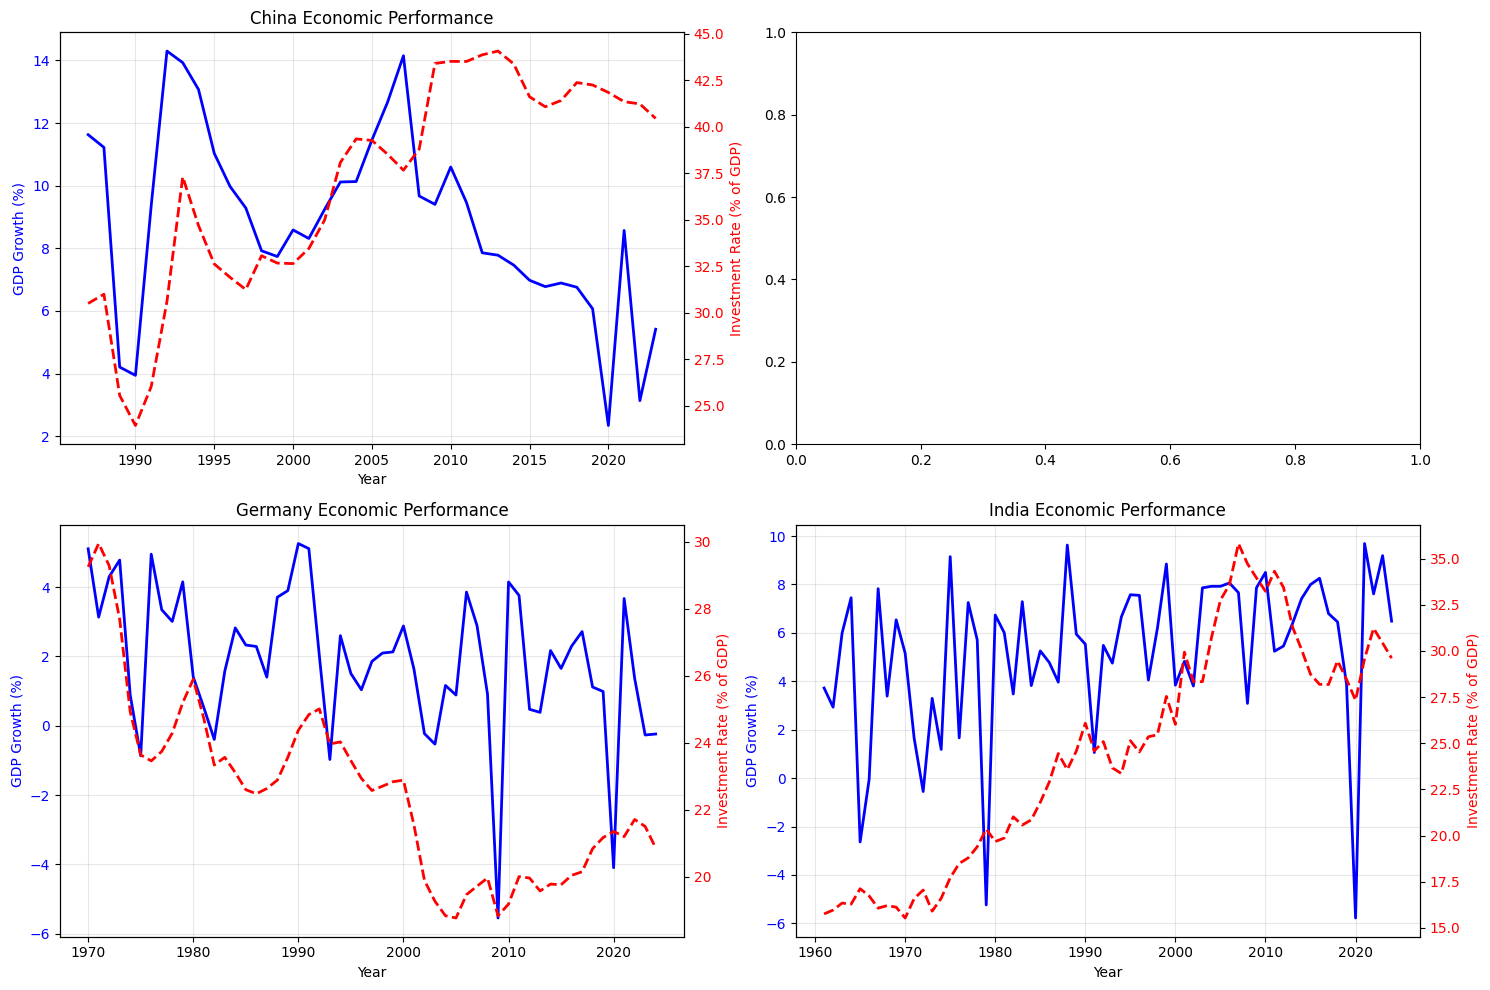


Analysis completed successfully!
Dataset includes 14 countries
Time period: 1961 to 2024
Total observations: 763


In [20]:
# Step 9: Visualization of results
plt.figure(figsize=(15, 12))

# Coefficient plot
plt.subplot(2, 2, 1)
coef_data = []
for var in X_vars:
    if var in coefficients:
        coef_data.append({'Variable': var, 'Coefficient': coefficients[var],
                         'Significant': p_values[var] < 0.05})

coef_df = pd.DataFrame(coef_data)
colors = ['green' if sig else 'red' for sig in coef_df['Significant']]
plt.barh(coef_df['Variable'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-')
plt.xlabel('Coefficient Value')
plt.title('Determinants of GDP Growth')
plt.grid(True, alpha=0.3)

# Investment vs GDP growth scatter
plt.subplot(2, 2, 2)
plt.scatter(df_clean['investment_rate'], df_clean['GDP_growth'], alpha=0.6)
plt.xlabel('Investment Rate (% of GDP)')
plt.ylabel('GDP Growth (%)')
plt.title('Investment vs GDP Growth')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_clean['investment_rate'], df_clean['GDP_growth'], 1)
p = np.poly1d(z)
plt.plot(df_clean['investment_rate'], p(df_clean['investment_rate']), "r--")

# Exports vs GDP growth
plt.subplot(2, 2, 3)
plt.scatter(df_clean['exports'], df_clean['GDP_growth'], alpha=0.6, color='orange')
plt.xlabel('Exports (% of GDP)')
plt.ylabel('GDP Growth (%)')
plt.title('Exports vs GDP Growth')
plt.grid(True, alpha=0.3)

z = np.polyfit(df_clean['exports'], df_clean['GDP_growth'], 1)
p = np.poly1d(z)
plt.plot(df_clean['exports'], p(df_clean['exports']), "r--")

# Country growth comparison
plt.subplot(2, 2, 4)
top_growth = country_stats.nlargest(10, 'Avg_Growth')['Avg_Growth']
top_growth.plot(kind='barh', color='skyblue')
plt.xlabel('Average GDP Growth (%)')
plt.title('Top 10 Countries by Average GDP Growth')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 10: Time-series analysis
print("\n" + "="*60)
print("TIME-SERIES ANALYSIS: ECONOMIC DEVELOPMENT PATTERNS")
print("="*60)

# Select representative countries
sample_countries = ['China', 'United States', 'Germany', 'India']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, country in enumerate(sample_countries):
    row, col = i // 2, i % 2
    country_data = df_clean[df_clean['country'] == country]

    if len(country_data) > 0:
        axes[row, col].plot(country_data['year'], country_data['GDP_growth'],
                           label='GDP Growth', linewidth=2, color='blue')
        axes[row, col].set_xlabel('Year')
        axes[row, col].set_ylabel('GDP Growth (%)', color='blue')
        axes[row, col].set_title(f'{country} Economic Performance')
        axes[row, col].tick_params(axis='y', labelcolor='blue')
        axes[row, col].grid(True, alpha=0.3)

        # Add investment on secondary axis
        ax2 = axes[row, col].twinx()
        ax2.plot(country_data['year'], country_data['investment_rate'],
                label='Investment Rate', linewidth=2, color='red', linestyle='--')
        ax2.set_ylabel('Investment Rate (% of GDP)', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

print("\nAnalysis completed successfully!")
print(f"Dataset includes {len(df_clean['country'].unique())} countries")
print(f"Time period: {df_clean['year'].min()} to {df_clean['year'].max()}")
print(f"Total observations: {len(df_clean)}")